In [7]:
# Imports

%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift
import scipy.signal as sc

# Práctica 5: Transformada Z

## Ejercicio 1
Aplicando la Transformada Z, y utilizando la propiedad de desplazamiento en el tiempo, determine la función de transferencia H(z) de los siguientes sistemas LTI causales:

1. $ y[n] - \frac{1}{2}y[n - 1] + \frac{1}{4} y[n-2] = x[n] $

$$ Y(z) - \frac{1}{2} Y(z) z^{-1} + \frac{1}{4} Y(z) z^{-2} = X(z) $$
$$ Y(z) (1 - \frac{1}{2} z^{-1} + \frac{1}{4}z^{-2} )= X(z) $$
$$ H(z) = \frac{Y(z)}{ X(z) } = \frac{1}{(1 - \frac{1}{2} z^{-1} + \frac{1}{4}z^{-2} )} $$

2. $ y[n] = y[n-1] + y[n-2] + x[n-1] $

$$ y[n] - y[n-1] - y[n-2] = x[n-1] $$
$$ Y(z) - Y(z) z^{-1} - Y(z) z^{-2} = X(z) z^{-1} $$
$$ Y(z) (1 - z^{-1} - z^{-2} )= X(z)*z^{-1} $$
$$ H(z) = \frac{Y(z)}{X(z)}  = \frac{z^{-1}}{(1 - z^{-1} - z^{-2} )} $$

3. $ y[n] = 7 x[n] + 2 y[n-1] - 6 y[n-2] $

$$ y[n] - 2 y[n-1] + 6 y[n-2] = 7 x[n]  $$
$$ Y(z) - 2 Y(z) z^{-1}  + 6 Y(z) z^{-2} = 7 X(z)  $$
$$ Y(z)  (1 - 2 z^{-1}  + 6 z^{-2}) = 7 X(z)  $$
$$ H(z) = \frac{Y(z)}{X(z)} = \frac{7}{(1 - 2 z^{-1}  + 6 z^{-2})} $$

4. $ y[n] = \sum^{7}_{k=0} 2^{-k} x[n-k] $

$$ Y(z) = \sum^{7}_{k=0} 2^{-k} X(z)z^{-k} $$
$$ \frac{Y(z)}{X(z)} = \sum^{7}_{k=0} 2^{-k} z^{-k} $$
$$ \frac{Y(z)}{X(z)} = \sum^{7}_{k=0} (2z)^{-k} $$

## Ejercicio 2
Encuentre la respuesta en frecuencia de los sistemas anteriores suponiendo una frecuencia de muestreo de 10kHz. Tenga en cuenta la relación entre la Transformada Z y la Transformada de Fourier.



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '|H(e^jw)|')

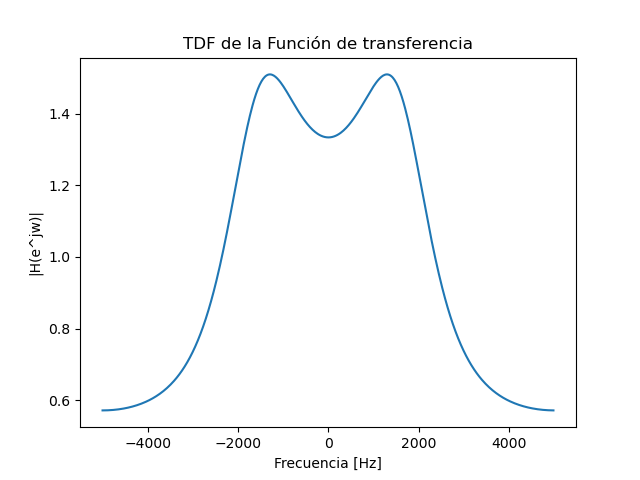

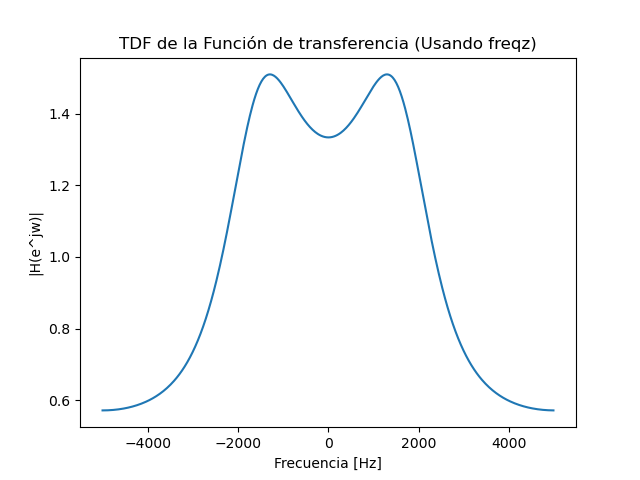

In [13]:
# para el grafico
N = 512; fm = 10000
f = np.arange(-fm//2, fm//2, fm/N)
omega = np.arange(0, 2*math.pi, 2*math.pi/N)
ejw = np.exp(1j * omega)
H = 1 / (1 - 1/2 * np.power(ejw,-1) + 1/4 * np.power(ejw, -2))

plt.figure()
plt.plot(f,fftshift(H)); plt.title('TDF de la Función de transferencia'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel('|H(e^jw)|')

freq = sc.freqz([1], [1, -1/2, 1/4], whole = True)
plt.figure()
plt.plot(f,fftshift(freq[1])); plt.title('TDF de la Función de transferencia (Usando freqz)'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel('|H(e^jw)|')